In [ ]:
#v1 of task 1 of learning ML
#working with tensors and numpy

In [1]:
import tensorflow as tf 
print(tf.__version__)


2.6.0


# **Predicting insurance charges based on age, sex, region, BMI, number of children and if the individual is a smoker**

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import *

--2021-11-08 17:47:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-08 17:47:52 (82.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Cleaning and preprocessing the data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

X = insurance.drop("charges", axis = 1)
Y = insurance["charges"]

X_train, X_test, y_train , y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [6]:
X_train_normal.shape

(1070, 11)

In [27]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(100, activation="relu"),
                                       tf.keras.layers.Dense(1000, activation="relu"),
                                       tf.keras.layers.Dense(10000, activation="relu"),
                                       tf.keras.layers.Dense(1000, activation="relu"),
                                       tf.keras.layers.Dense(100, activation="relu"),
                                       tf.keras.layers.Dense(10, activation="relu"),
                                       tf.keras.layers.Dense(1)
])

insurance_model.compile(loss= tf.keras.losses.mean_absolute_error, optimizer=tf.keras.optimizers.Adam(), metrics = ["mae"])

Finding the optimum learning rate and fitting the model

In [29]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 
history = insurance_model.fit(X_train_normal, 
                      y_train, 
                      epochs=100)


Epoch 1/100
34/34 [==============================] - 7s 188ms/step - loss: 10750.2930 - mae: 10750.2930
Epoch 2/100
34/34 [==============================] - 7s 206ms/step - loss: 6737.9800 - mae: 6737.9800
Epoch 3/100
34/34 [==============================] - 8s 224ms/step - loss: 4351.2446 - mae: 4351.2446
Epoch 4/100
34/34 [==============================] - 6s 190ms/step - loss: 3473.6985 - mae: 3473.6985
Epoch 5/100
34/34 [==============================] - 6s 189ms/step - loss: 3199.4187 - mae: 3199.4187
Epoch 6/100
34/34 [==============================] - 6s 189ms/step - loss: 3038.2295 - mae: 3038.2295
Epoch 7/100
34/34 [==============================] - 6s 188ms/step - loss: 3014.6423 - mae: 3014.6423
Epoch 8/100
34/34 [==============================] - 6s 188ms/step - loss: 2948.4939 - mae: 2948.4939
Epoch 9/100
34/34 [==============================] - 6s 189ms/step - loss: 2878.4133 - mae: 2878.4133
Epoch 10/100
34/34 [==============================] - 6s 189ms/step - loss: 2758

Plotting loss curves and learning rate relations

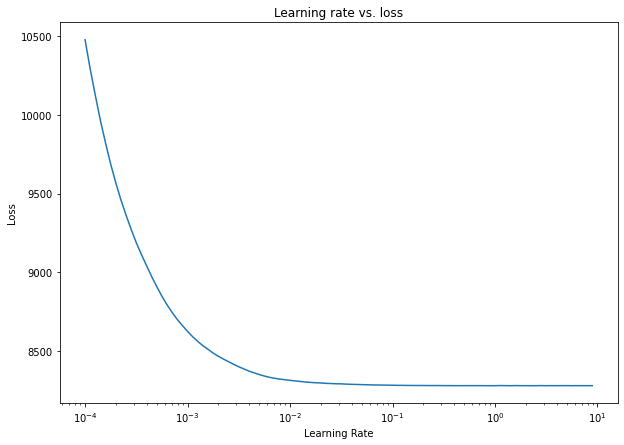

In [16]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

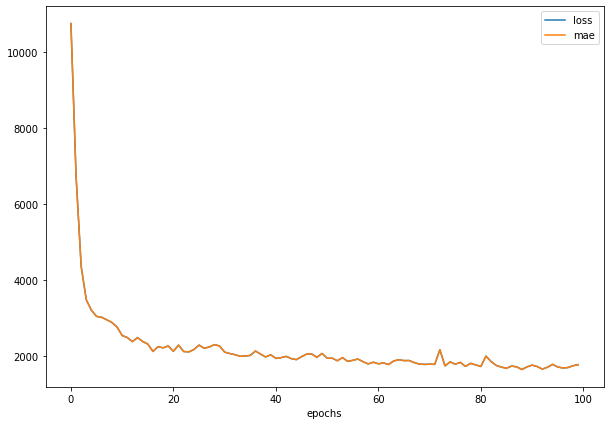

In [32]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

Evaluting the Model


In [30]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 1s 41ms/step - loss: 1801.5175 - mae: 1801.5175


[1801.5174560546875, 1801.5174560546875]